# EHealth 705

## Python Tutorial: Confidence Intervals and Hypothesis Testing

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [Hypothesis testing concepts](#Concepts)
2. [Implementing one-sample Z](#Ztest)
3. [Implementing one-sample t-tests](#Ttest)
5. [Practical exercise: Conduct a hypothesis test on health data](#Practical_exercise)
4. [Reviewing and interpreting test results](#TestResult)
6. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
7. [Assignment](#Assignment)



#### Date : Feb 29th, 2024


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)
  
  
  
#### Explanation  
  
  
  
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [2]:
# conda install -c conda-forge ydata-profiling

In [2]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [3]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Hypothesis testing concepts <a id="Concepts"></a>

### Introduction


Statistical inference involves two areas: estimation and hypothesis testing.

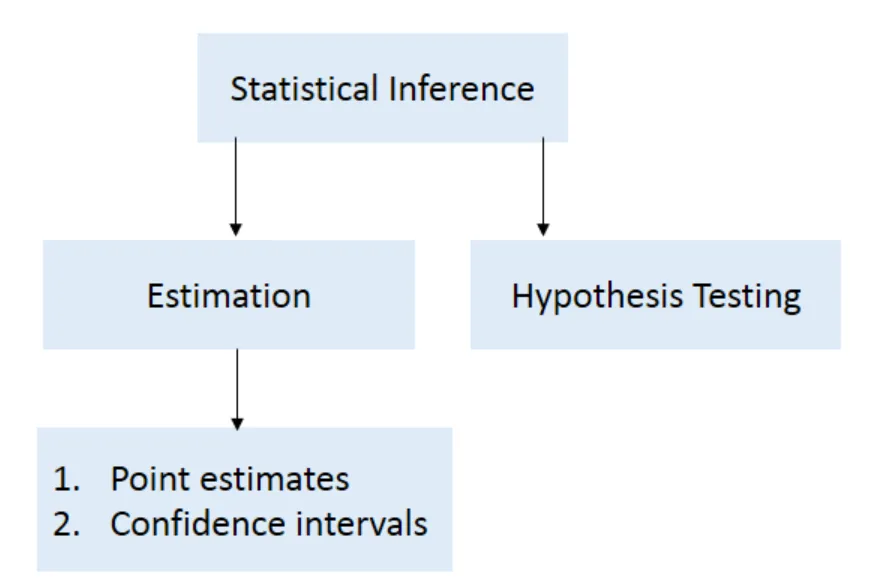


### Point Estimates
Point estimates are single value estimates of population parameters, and confidence intervals are ranges of estimated values within which the actual value of the parameter will lie with a given probability. Desirable statistical properties of an estimator include unbiasedness, efficiency, and consistency.



### Hypothesis Testing

Hypothesis testing is all about making informed decisions based on evidence from data. When we have collected data from experiments, surveys, or observations, we often want to determine if the observed differences or effects (i.e., x̄ - µ) are statistically significant or just the result of random chance. The Z-test and T-test help us quantitatively assess the significance of these differences, allowing us to make well-founded decisions with confidence.

The hypothesis testing process requires a statement of a null and an alternative hypothesis, the selection of the appropriate test statistic, specification of the significance level, a decision rule, the calculation of a sample statistic, a decision regarding the hypotheses based on the test, and a decision based on the test results.

The null hypothesis is what the researcher wants to reject. The alternative hypothesis is what the researcher wants to prove, and it is accepted when the null hypothesis is rejected.

Once the test statistic (Z statistic or T statistic) is calculated, we determine the critical region — the region of extreme values that would lead us to reject the null hypothesis. This critical region is established based on the chosen significance level (alpha), which represents the probability of making a Type I error (rejecting the null hypothesis when it is true). Common significance levels include 0.05 (5%) or 0.01 (1%).

If the calculated test statistic falls within the critical region, we reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed sample results are statistically significant.


### P-Value

Another approach to evaluating the sample statistic is through the use of p-values. The p-value represents the probability of obtaining a test statistic as extreme as the observed value, assuming the null hypothesis is true. A small p-value (typically less than the chosen significance level) indicates strong evidence against the null hypothesis, leading us to reject it in favor of the alternative hypothesis.


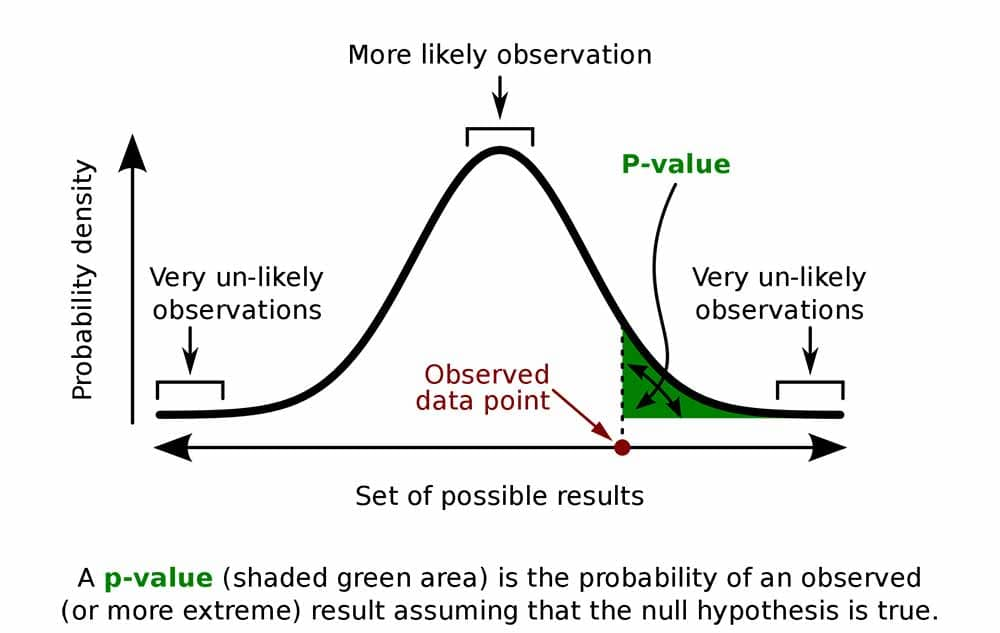


### Formulate Hypotheses

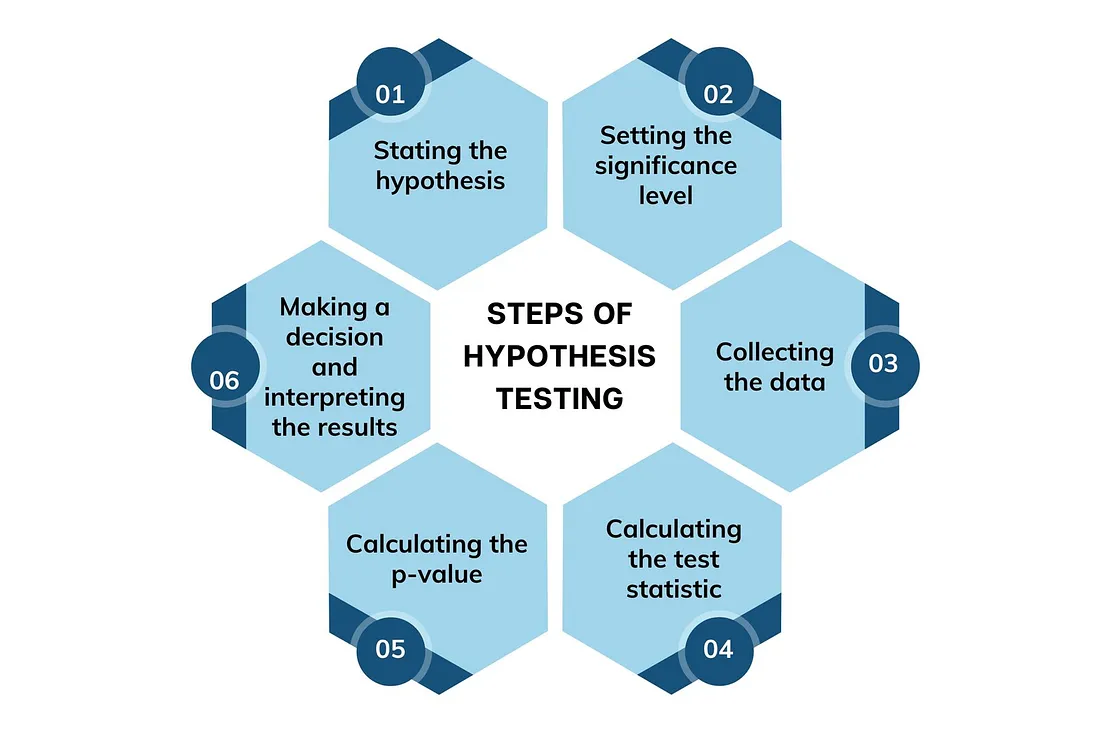


1. Formulate Hypotheses: Define the null and alternative hypotheses based on the research question.

2. Choose a Test: Select an appropriate statistical test based on data type (e.g., t-test for means, chi-square for proportions).

3. Set Significance Level: Determine the threshold for rejecting the null hypothesis (usually 0.05 or 0.01).

4. Collect Data: Gather relevant sample data using appropriate methods.

5. Compute Test Statistic: Apply the chosen statistical formula to calculate the test statistic.

6. Determine Critical Value : Compare the test statistic with the `critical value` or use it to calculate the p-value.

7. Make a Decision: If the test statistic exceeds the critical value or the p-value is less than the significance level, reject the null hypothesis; otherwise, fail to reject it.



### Null & Alternative Hypotheses
The Null and Alternative Hypotheses are two competing claims that researchers weigh evidence for and against using a statistical test :

* Null hypothesis (H0) : There’s no effect in the population.
* Alternative hypothesis (H1) : There’s an effect in the population.

A null hypothesis (H0) always predicts no true effect, no relationship between variables, or no difference between groups.
An alternative hypothesis (H1) states your main prediction of a true effect, a relationship between variables, or a difference between groups.

Hypothesis testing always starts with the assumption that the null hypothesis is true. Using this procedure, you can assess the likelihood (probability) of obtaining your results under this assumption. Based on the outcome of the test, you can reject or retain the null hypothesis.


### Pitfalls and Considerations
**Type I Error: Incorrectly rejecting the null hypothesis (false positive).**

**Type II Error: Failing to reject a false null hypothesis (false negative).**

**Sample Size: Larger samples can provide more reliable results.**

**Assumptions: Tests may have underlying assumptions (e.g., normality of data) that need validation.**



### Type I and Type II Errors
A Type I error is the rejection of the null hypothesis when it is actually true, while a Type II error is the failure to reject the null hypothesis when it is actually false.


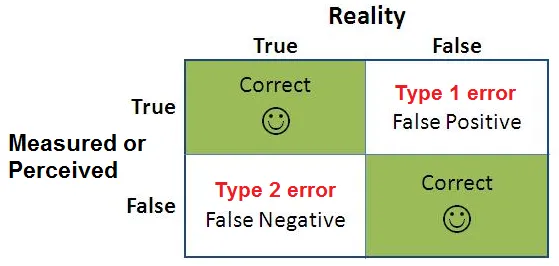


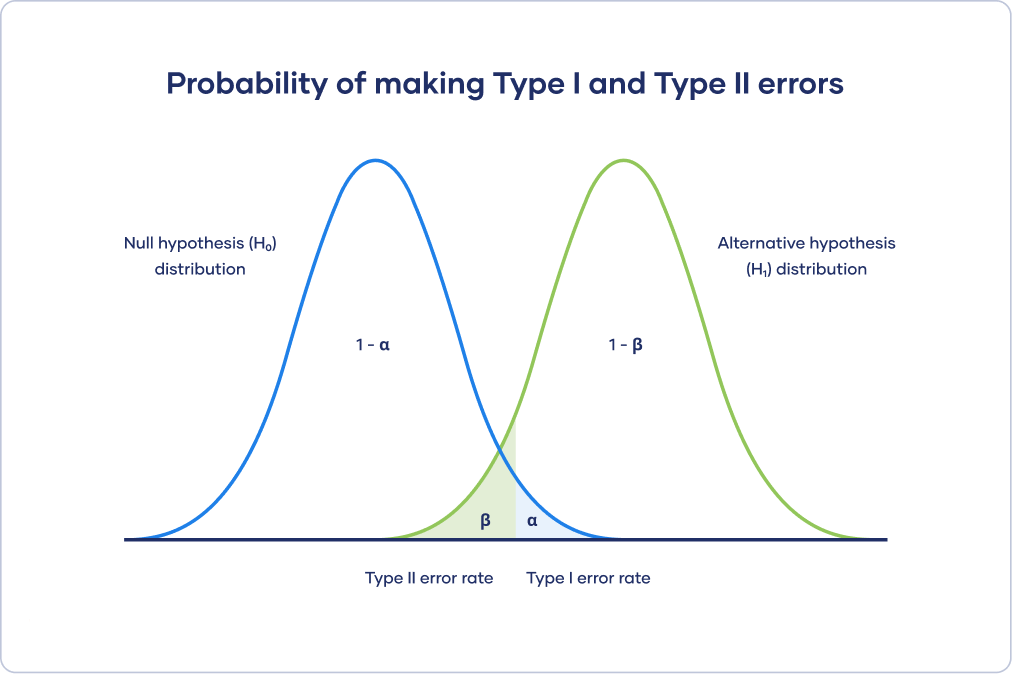




# Implementing one-sample Z <a id="Ztest"></a>

### The z-Test

Z test uses the Z-statistic that follows the standard normal distribution, `N ~ (0, 1)`.

Based on the `Central Limit Theorem`, we know the sampling distribution of the sample statistic (x̄) follows a normal distribution.

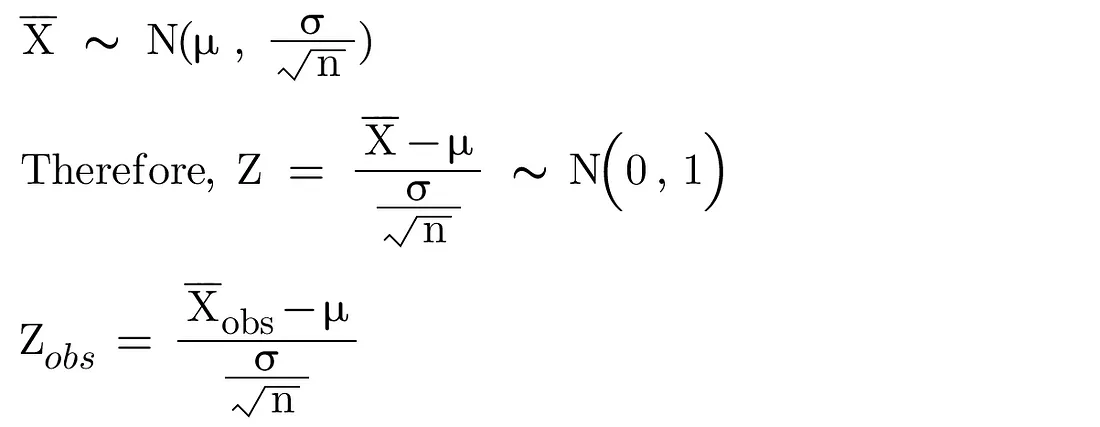


By comparing the observed Z-statistic to critical values from the standard normal distribution table at a chosen significance level (α), we can determine whether the observed sample mean is statistically significant or whether it could be reasonably expected to occur due to random chance.

If the Z-statistic falls within the critical region (the extreme tails of the standard normal distribution), we reject the null hypothesis in favor of the alternative hypothesis, indicating that the sample mean differs significantly from the population mean. On the other hand, if the Z-statistic falls within the non-critical region, we fail to reject the null hypothesis, suggesting that the observed difference is not statistically significant.



The standard normal distribution (z-distribution) is used to construct confidence intervals for for the population mean when the population variance is known. The (1-α) confidence interval for the population mean, μ, is:

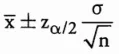


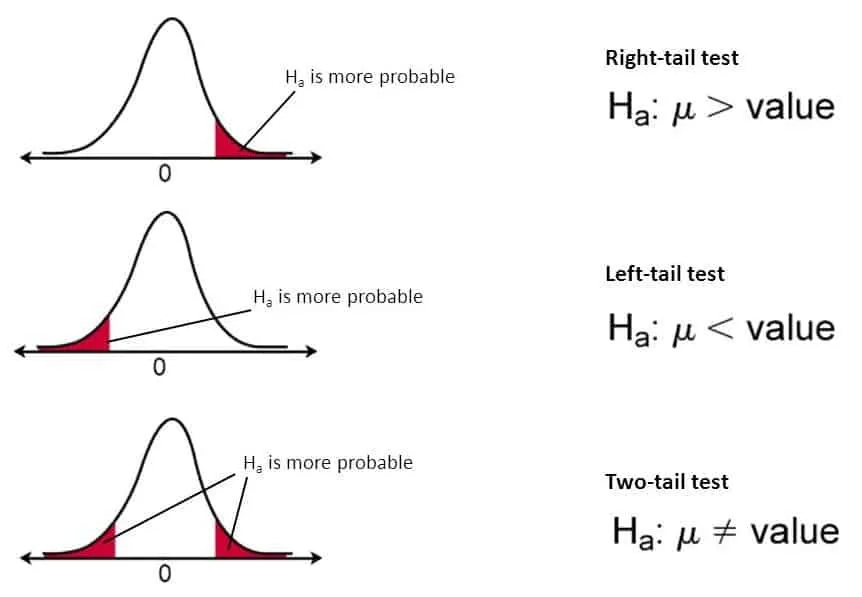


In [5]:
import numpy as np
from scipy import stats

# Example data: Sample data, population mean, and population standard deviation
sample_data = np.random.normal(0, 1, size=100)
population_mean = 0
population_std = 1  # Known standard deviation of the population
n = len(sample_data)

# Calculate the sample mean
sample_mean = np.mean(sample_data)

# Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

print(f"Z-statistic: {z_statistic}, P-value: {p_value}")


Z-statistic: -1.201253242522579, P-value: 0.22965298193474926


### Hypothesis Testing Scenario: Effect of a New Diet on Blood Pressure

#### Background
Researchers are studying the impact of a new diet on systolic blood pressure. Previous studies have shown that the average systolic blood pressure for the general population is 120 mmHg, with a standard deviation of 15 mmHg. The aim is to determine if the new diet leads to a significant change in blood pressure.

#### Hypotheses
- **Null Hypothesis (H0)**: The mean systolic blood pressure of individuals on the new diet is equal to 120 mmHg.
- **Alternative Hypothesis (H1)**: The mean systolic blood pressure of individuals on the new diet is different from 120 mmHg.

#### Significance Level
- A significance level (\(\alpha\)) of 0.05 is chosen for the test.

#### Data Collection
- A random sample of 100 individuals participating in the new diet was taken, and their systolic blood pressures were measured. The sample mean systolic blood pressure was found to be 117 mmHg.

#### Statistical Test
- A one-sample Z-test will be performed to evaluate the null hypothesis.

### Python Code for Z-test

In [1]:

import numpy as np
from scipy.stats import norm

# Given values
population_mean = 120  # Population mean
population_std = 15    # Population standard deviation
sample_mean = 117      # Sample mean (from our study)
sample_size = 100      # Number of individuals in the sample

# Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate the p-value
p_value = 2 * norm.cdf(-np.abs(z_statistic))  # Two-tailed test

# Display the results
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

Z-statistic: -2.0
P-value: 0.04550026389635839


### Interpretation
- If the p-value is less than 0.05, we reject the null hypothesis, indicating that the new diet has a significant effect on systolic blood pressure.
- If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, suggesting that the diet does not have a significant impact on systolic blood pressure compared to the general population average.

# Implementing one-sample T <a id="Ttest"></a>

### T-test 
T-test uses the t-statistic, which is used when the population standard deviation (σ) is unknown. It is typically employed with small sample sizes (usually less than 30) and follows a t-distribution, which accounts for the increased uncertainty due to limited data.

The sample size determines the degree of freedom of the t-distribution and therefore, affects the shape of the t-distribution. As you can see in the following figure, the smaller the sample size, the fatter the tails of t-distribution will be.

we can compute T-statistic using the following formula. The only difference here is we will estimate the population standard deviation (σ) using the sample standard deviation (S).


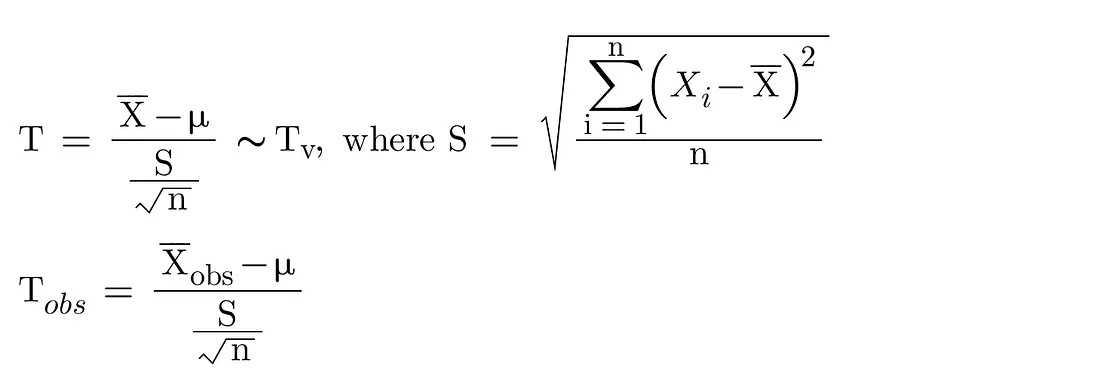



### Confidence Interval
Thet-distribution is used to construct confidence intervals for the population mean when the population variance is not known. The (1-α) confidence interval for the population mean, μ, is:
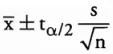

Use the t-distribution if:

* Population distribution is normal with an unknown variance (large or small sample).
* Population distribution is nonnormal with unknown variance, but the sample is large (n >30).




Suppose we have two samples of the same size n1 = n2 = n having mean and standard deviation: M1, s1 and M2, s2 respectively. Then the t-test for these independent samples is computed as:

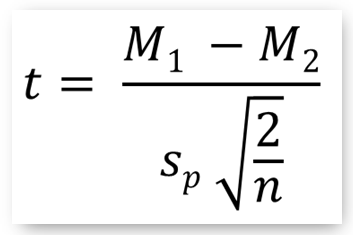

where sp is the pooled (or composite) standard deviation of the two samples.


### t-Test conditions and Criteria


* The sample sizes are the same: n1 = n2 = n
* The populations (where the samples come from) follwo the normal distribution (normality criterion), and
* The variances of the populations are also the same (variety criterion)
When the above do not hold true then adjustments or even totally different statistical controls apply as we explain further below.



### two-tailed test VS  one-tailed test


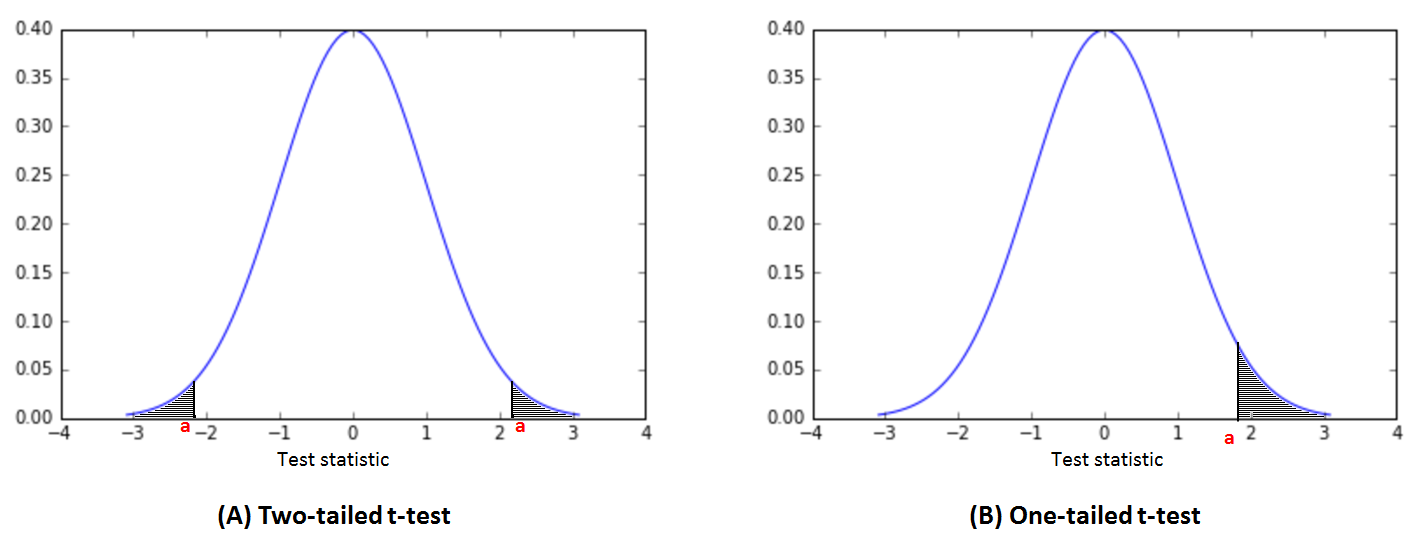



#### Two Sided T test

A two-tailed test results from a two-sided alternative hypothesis.

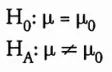
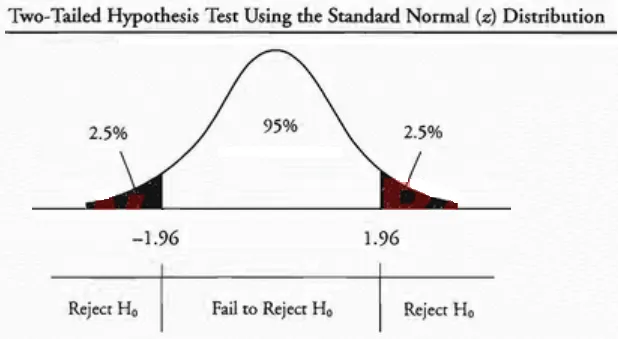

#### One Sided T test


A one-tailed test results from a one-sided alternative hypothesis:
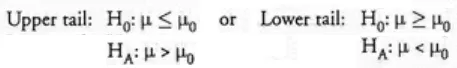
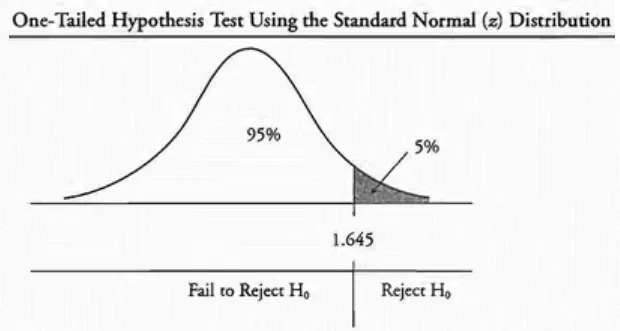

The decision rule depends on the alternative hypothesis and the distribution of the test statistic.



### Unknown and Known Population Variances
With unknown population variance, the t-statistic is used for tests of the mean of a normally distributed population:

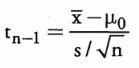
If the population variance is known, the appropriate test statistic the z-statistic for tests of the mean of a population:


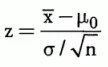




As the sample size increases, t-distribution will converge to standard normal distribution because when the sample size is sufficiently large, the sample standard deviation will approach the population standard deviation.


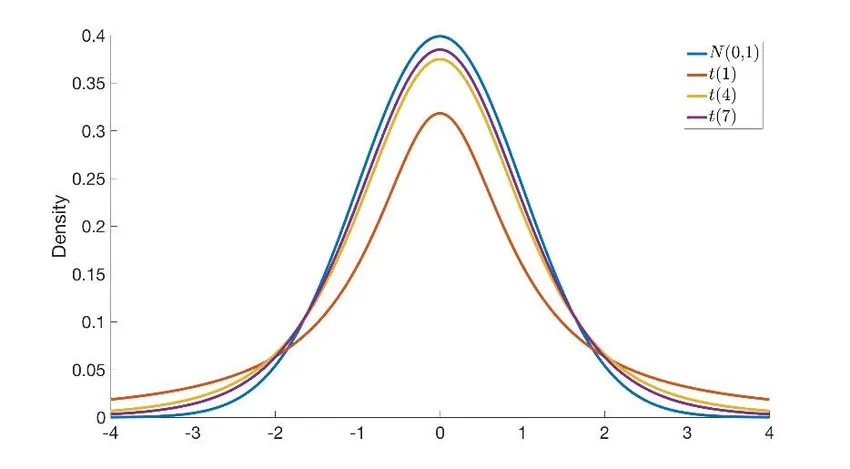




* **Small Sample Size**: When our sample size is small, typically less than 30, we have limited data points to work with. This introduces increased uncertainty and variability in our estimates. The T-test accounts for this by using a different probability distribution called the t-distribution, which has fatter tails compared to the standard normal distribution used in the Z-test. The fatter tails allow for greater variability, accommodating the inherent uncertainty associated with smaller sample sizes. By considering this variability, the T-test provides more accurate and reliable results when dealing with limited data.






* **Unknown Population Standard Deviation**: In many real-world scenarios, the population standard deviation is unknown. Estimating it from the sample standard deviation introduces additional uncertainty. The T-test incorporates this uncertainty through the concept of degrees of freedom, which adjusts for the uncertainty in the estimated standard deviation. It uses a formula that accounts for the sample size and sample variability, resulting in a more precise test statistic. This makes the T-test suitable for situations where we lack knowledge about the population standard deviation.


In [6]:
from scipy.stats import ttest_1samp

# Sample data
sample_data = np.random.normal(0, 1, size=30)
# Hypothesized population mean
hypothesized_mean = 0

# Perform t-test
t_stat, p_value = ttest_1samp(sample_data, popmean=hypothesized_mean)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.65365460247964, P-value: 0.5184841662804467


In [9]:

np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data for Minnesota, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:

In [10]:
from scipy import stats
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)


The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [11]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [12]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [13]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.
Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [14]:
from math import sqrt
sigma = minnesota_ages.std()/sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)


On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [15]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

## Confidence interval

#### T-TEST

Given m the mean value, s the sample standard deviation and N the sample size, the confidence interval is defined by the following formula:

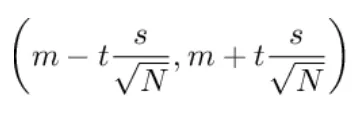

There’s a t parameter, as you can see, which is related to the confidence we want. The calculation of this parameter can be done in different ways. If our sample size is small (i.e. less than 30 points), we can use Student’s t distribution to calculate it. Given the confidence, we have to select that value of t that gives an area of the distribution in [-t,t] interval that is equal to our confidence.

In [16]:
import numpy as np 
from scipy.stats import t

np.random.seed(123) # Setting the seed for reproducibility

x = np.random.normal(size=100)

m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 


(-0.1967583131996904, 0.2509764601804099)

We know it’s correct because the normal distribution has 0 mean, but if we don’t know anything about the population, we could say that, with 95% confidence, the expected value of the population lies between -0.19 and 0.25.

In [16]:
### Z_TEST

import numpy as np
import scipy.stats as stats

# Generate sample data - let's assume we have a sample of test scores
np.random.seed(0) # for reproducibility
data = np.random.normal(loc=100, scale=15, size=30) # sample mean = 100, pop std dev = 15, sample size = 30

# Known population standard deviation
sigma = 15

# Sample mean
x_bar = np.mean(data)

# Sample size
n = len(data)

# Confidence level (e.g., 95%)
confidence_level = 0.95

# Z-score
z = stats.norm.ppf((1 + confidence_level) / 2)

# Margin of error
margin_error = z * (sigma / np.sqrt(n))

# Confidence interval
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error

ci_lower, ci_upper, x_bar


(101.27526427779615, 112.0104291400991, 106.64284670894763)

# Practical exercise: Conduct a hypothesis test on health data<a id="Practical_exercise"></a>


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.describe().T.style.background_gradient(cmap='Greens').format("{:.2f}")


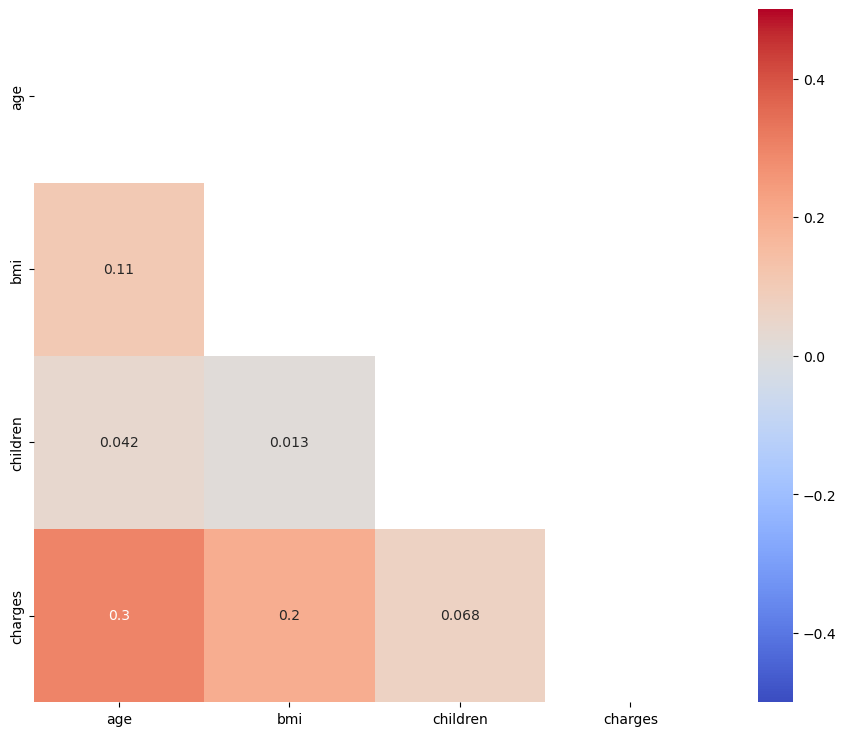

In [21]:
# Calculate the correlation matrix.
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(11, 9))

sns.heatmap(corr,
            vmin=-0.5,
             vmax=.5,
            cmap='coolwarm',
            annot=True,
            mask = mask);


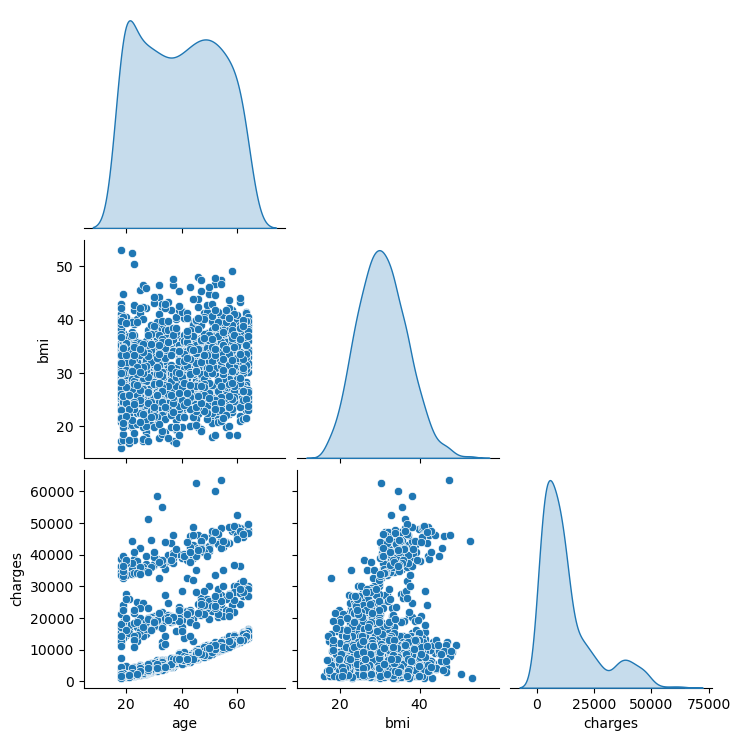

In [22]:
df_attr = df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot"

### EXP: One_Sample Ztest

Let's start with the One-Sample Z-Test example, focusing on comparing the average insurance charges from our sample to the known or assumed population mean. We'll follow these steps:


1. Extract a Random Sample: We'll use a subset of the 'charges ' data.
2. Calculate the Sample Mean: This gives us an estimate of the central tendency.
3. Perform the Z-Test: Using the sample mean, known population mean, sample standard deviation, and the size of the sample.
4. Interpret the Results: Based on the Z-statistic and p-value.
5. Visualization: To illustrate the sample distribution and the population mean.


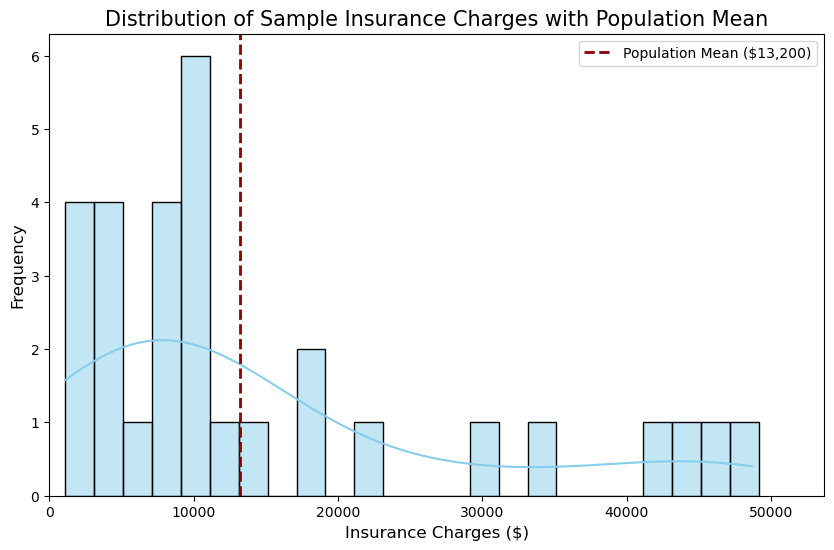

In [24]:
import pandas as pd
import numpy as np

    #Step 1: Extract a Random Sample

from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 1: sampling
# Assuming insurance_data is already loaded
sample_charges = df['charges'].sample(30, random_state=42)  # Ensure reproducibility
# Step 2: Sample Mean
sample_mean_charges = np.mean(sample_charges)



# Step 3: Perform Z-Test
population_mean_charges = 13200  # Assumed population mean
sample_std_charges = np.std(sample_charges, ddof=1)
z_stat_charges = (sample_mean_charges - population_mean_charges) / (sample_std_charges / np.sqrt(len(sample_charges)))
p_value_charges = 2 * norm.sf(np.abs(z_stat_charges))

# Step 5: Visualization
# Setting figure size for better visibility
plt.figure(figsize=(10, 6))

# Plotting the histogram with kernel density estimation for a smoother distribution curve
sns.histplot(sample_charges, kde=True, color='skyblue', binwidth=2000, bins=20)

# Adding a vertical line for the population mean
plt.axvline(population_mean_charges, color='darkred', linestyle='dashed', linewidth=2, label='Population Mean ($13,200)')

# Enhancing the plot with titles and labels
plt.title('Distribution of Sample Insurance Charges with Population Mean', fontsize=15)
plt.xlabel('Insurance Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Adjusting x-axis scale for better visualization
plt.xlim(left=0, right=sample_charges.max() + 5000)

# Display the plot
plt.show()

In [25]:
z_stat_charges, p_value_charges

(0.735002871753399, 0.4623377451673636)

In [20]:
sample_mean_charges

15123.986305

Z-Test Results
- Z-Statistic: 0.201
- P-Value: 0.841

Hypotheses:

Null hypothesis (H0): The mean insurance charge of the sample is equal to $13200.

Alternative hypothesis (H1): The mean insurance charge of the sample is not equal to $13,200.



Given the high p-value (0.841), we do not have sufficient evidence to reject the null hypothesis. This means that the observed difference in mean insurance charges between our sample and the assumed population mean of $13,200 can be attributed to random chance. In practical terms, there is no statistically significant difference between the sample mean and the population mean.


## EXP: One_Sample Ttest

Let's start with implementing a one-sample T-test on the dataset. We'll focus on the 'bmi variable.
Step 1: State the Hypotheses
- Null hypothesis (H0): The mean BMI of the sample is equal to the national average BMI of 28.7.
- Alternative hypothesis (H1): The mean BMI of the sample is not equal to the national average BMI of 28.7.

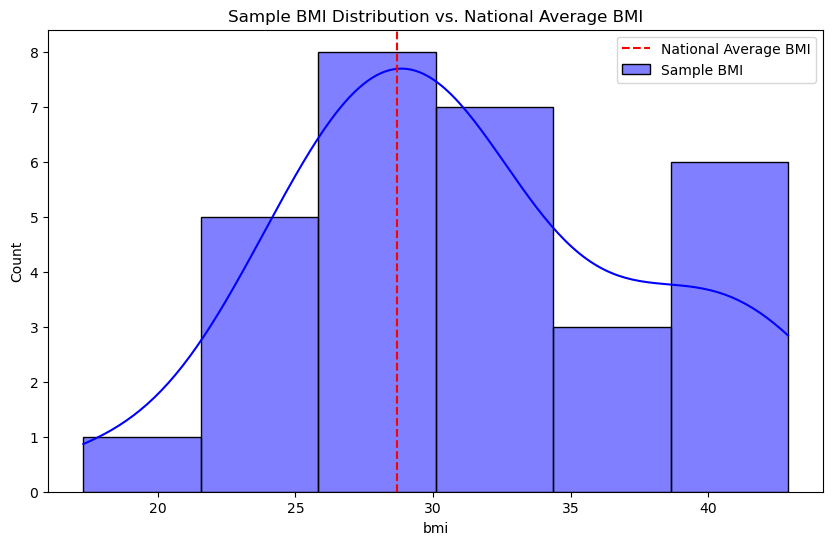

T-statistic: 2.20, P-value: 0.035904


In [26]:
from scipy.stats import ttest_1samp

# Assume the national average BMI is 28.7
national_avg_bmi = 28.7

# Select a random sample of BMI data from the dataset
sample_bmi = df['bmi'].sample(30, random_state=42)

# Perform the one-sample T-test
t_stat, p_value = ttest_1samp(sample_bmi, popmean=national_avg_bmi)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(sample_bmi, kde=True, color='blue', label='Sample BMI')
plt.axvline(x=national_avg_bmi, color='red', linestyle='--', label='National Average BMI')
plt.title('Sample BMI Distribution vs. National Average BMI')
plt.legend()
plt.show()

# Print the results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.6f}")


Given the results of the one-sample T-test with a T-statistic of 2.20 and a P-value of 0.035904, here's the interpretation:

Interpretation of Results:
T-statistic (2.20): This value indicates how many standard deviations the sample mean BMI is from the hypothesized national average BMI of 28.7. A positive value suggests that the sample mean is higher than the hypothesized mean.

P-value (0.035904): The P-value tells us the probability of observing the sample data, or something more extreme, if the null hypothesis were true. In this case, the P-value is approximately 0.036, which is less than the commonly used significance level of 0.05.

Conclusion:
Since the P-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This means there is a statistically significant difference between the sample mean BMI and the hypothesized national average BMI of 28.7.

The positive T-statistic suggests that the sample mean BMI is higher than the national average. This could indicate that the individuals in this sample, on average, have a higher BMI than what is considered the national average.

Implications:
Rejecting the null hypothesis and finding a significant difference in BMI can have various implications depending on the context of the study. For instance, it might suggest that the population from which the sample was drawn has different health characteristics compared to the national population.

This finding could prompt further investigation into the reasons behind the higher average BMI in the sample, such as differences in diet, lifestyle, or other demographic factors.

# Q&A and Troubleshooting <a id="QA-and-Troubleshooting"></a>

#### Practical Exercise Solutions and Insights

- **Analyzing Insurance Dataset for Practical Exercises**:
  - [Insurance Claims EDA & Hypothesis Testing](https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing)
  - [Medical Cost Analysis](https://www.kaggle.com/code/raman007/medical-cost-analysis)
  - [Hypothesis Testing of Health Insurance Data](https://www.kaggle.com/code/jordanrich/hypothesis-testing-of-health-insurance-data/input)
  - [Hypothesis Testing for Beginners](https://www.kaggle.com/code/vinayakshanawad/hypothesis-testing-for-beginners)
  - [Hypothesis Test for Health Insurance Dataset](https://www.kaggle.com/code/yashgupta011/hypothesis-test-for-health-insurance-dataset/notebook)
  - [EDA, Hypothesis Testing, MLR Stats Report Style](https://www.kaggle.com/code/sashatarakanova/eda-hypothesis-testing-mlr-stats-report-style)
  - [EDA and Statistical Hypothesis Testing](https://www.kaggle.com/code/nazeernazeer/eda-and-statistical-hypothesis-testing/input)
  - [Insurance EDA & Hypothesis Testing](https://www.kaggle.com/code/mayank2896/insurance-eda-hypothesis-testing)
  - [EDA, Visualization, Regression & Hypothesis Testing](https://www.kaggle.com/code/dmitriyveselov/eda-visualization-regression-hypothesis-testing)
  - [Insurance EDA & Hypothesis Testing by Sameerudgirkar](https://www.kaggle.com/code/sameerudgirkar/insurance-eda-hypothesis-testing)

#### Datasets

- **Health Insurance Dataset for Practical Exercises**:
  - [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)

#### Additional Resources and Guides

- **Guide to Hypothesis Testing and Statistical Analysis**:
  - [Hypothesis Testing Notebook on GitHub](https://github.com/TheMrityunjayPathak/MachineLearningMathematics/blob/main/Statistics/Hypothesis%20Testing.ipynb)
  - [Getting Started Discussion on Kaggle](https://www.kaggle.com/discussions/getting-started/352639)
  - [How to Perform Hypothesis Testing Using Python on Medium](https://medium.com/illumination/how-to-perform-hypothesis-testing-using-python-bf71c2d6f627)
  - [Hypothesis Testing: A Comprehensive Guide on Medium](https://medium.com/@pelinokutan/hypothesis-testing-a-comprehensive-guide-5da5e0808c2d)
  - [Conducting Actuarial Studies Part 5: Statistical Inference, Estimation, and Hypothesis Testing on Medium](https://medium.com/@polanitzer/conducting-actuarial-studies-part-5-statistical-inference-estimation-and-hypothesis-testing-423330119dcf)
  - [Hypothesis Testing: Z-test vs T-test Blog Post](https://blog.stackademic.com/hypothesis-testing-z-test-vs-t-test-128591cc10fd)
  - [T-test Independent Samples](http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-indep.html)
  - [Tests as Linear](https://www.georgeho.org/tests-as-linear/)
  - [Permutation Test Example Gallery](https://www2.stat.duke.edu/~ar182/rr/examples-gallery/PermutationTest.html)
  - [Scipy Lectures on Statistics](https://scipy-lectures.org/packages/statistics/index.html)
  - [Python for Data Analysis Part 24: Probability Distributions](https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html)




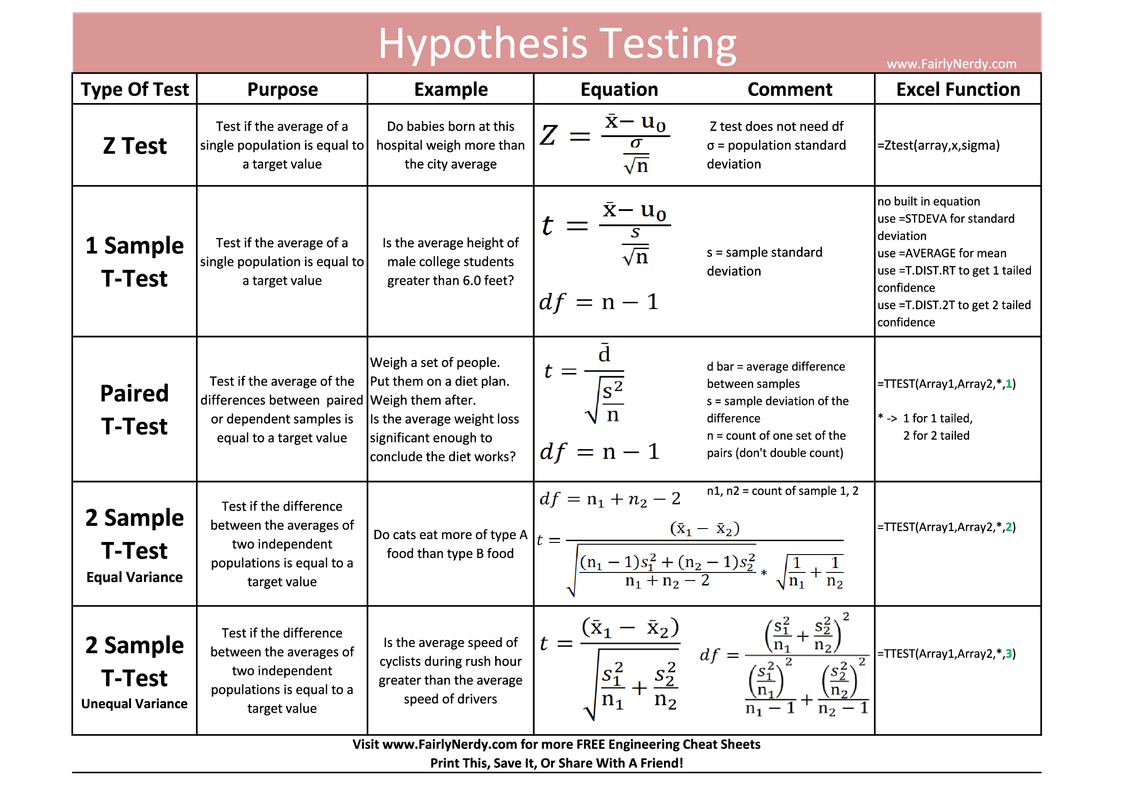

# Assignment <a id="Assignment"></a>

## Assignment 1: One-Sample T-Test on Age


Objective:
To determine if the average age of individuals in our dataset significantly differs from a hypothesized average age of the general population. For this assignment, we'll assume the hypothesized average age is 40 years.

In [27]:
from scipy.stats import ttest_1samp
import pandas as pd


# Hypothesized average age
hypothesized_age = 40

# Select a random sample of age data
sample_age = df['age'].sample(30, random_state=42)

# Perform the one-sample T-test
t_stat_age, p_value_age = ttest_1samp(sample_age, popmean=hypothesized_age)

# Results
print(f"Age - T-statistic: {t_stat_age:.2f}, P-value: {p_value_age:.6f}")


Age - T-statistic: 0.09, P-value: 0.927672


## Assignment 2: Confidence Interval for Age Using Z-Test

Objective:
To calculate a 95% confidence interval for the mean age of individuals in our dataset, assuming the sample mean and standard deviation are good estimates for the population parameters.



In [29]:
from scipy.stats import norm
import numpy as np

# Calculate the mean and standard deviation of age
mean_age = df['age'].mean()
std_age = df['age'].std(ddof=1)/np.sqrt(n)

# Calculate the 95% confidence interval for the mean age
z_value = norm.ppf(0.975)  # Z-value for 95% confidence
margin_of_error = z_value * std_age

lower_bound = mean_age - margin_of_error
upper_bound = mean_age + margin_of_error

# Results
print(f"95% Confidence Interval for Age: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval for Age: (34.18, 44.23)


Assignment 1: If the P-value is less than 0.05, reject the null hypothesis, indicating the sample mean age significantly differs from the hypothesized mean of 40 years. Otherwise, there's insufficient evidence to conclude a significant difference.

Assignment 2: The 95% confidence interval provides a range within which we are 95% confident that the true mean age of the population falls. If the hypothesized mean (e.g., 40 years) is not within this interval, it suggests the sample provides evidence that the population mean might be different from the hypothesized mean.